In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics_2/GemPy 2.3.1/"
geo_model = gp.create_model("BES_model_seismic_v1")

No module named 'osgeo'


In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[425000, 480000, 7780000, 7800000, -7000, -2000],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_1000m.csv",
    #path_o=data_path + "orientation_points.csv",
)

Active grids: ['regular']


BES_model_seismic_v1  2024-02-28 14:42

In [3]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat": ("MAASTRICHTIANO", "CENOMANIANO"),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Strat,1,#015482,1
1,CENOMANIANO,Strat,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
geo_model.set_default_orientation()

In [5]:
geo_model.get_data()

X             Y           Z    smooth   
surface_points 0     431215.58100  7.798428e+06 -2784.95000  0.000002  \
               1     432015.61700  7.798428e+06 -2833.81000  0.000002   
               2     433015.66200  7.798428e+06 -2896.70000  0.000002   
               3     434015.70600  7.798428e+06 -2958.58000  0.000002   
               4     435015.75100  7.798428e+06 -3020.15000  0.000002   
...                           ...           ...         ...       ...   
               1107  471005.51900  7.785980e+06 -5879.33000  0.000002   
               1108  472005.56400  7.785980e+06 -5994.45000  0.000002   
               1109  473005.60900  7.785980e+06 -6065.91000  0.000002   
               1110  474005.65300  7.785980e+06 -6137.75000  0.000002   
orientations   0          0.00001  1.000000e-05     0.00001  0.010000   

                            surface  G_x  G_y  G_z  
surface_points 0     MAASTRICHTIANO  NaN  NaN  NaN  
               1     MAASTRICHTIANO  NaN  NaN  NaN  
               2     MAASTRICHTIANO  NaN  NaN  NaN  
               3     MAASTRICHTIANO  NaN  NaN  NaN  
               4     MAASTRICHTIANO  NaN  NaN  NaN  
...                             ...  ...  ...  ...  
               1107     CENOMANIANO  NaN  NaN  NaN  
               1108     CENOMANIANO  NaN  NaN  NaN  
               1109     CENOMANIANO  NaN  NaN  NaN  
               1110     CENOMANIANO  NaN  NaN  NaN  
orientations   0     MAASTRICHTIANO  0.0  0.0  1.0  

[1112 rows x 8 columns]

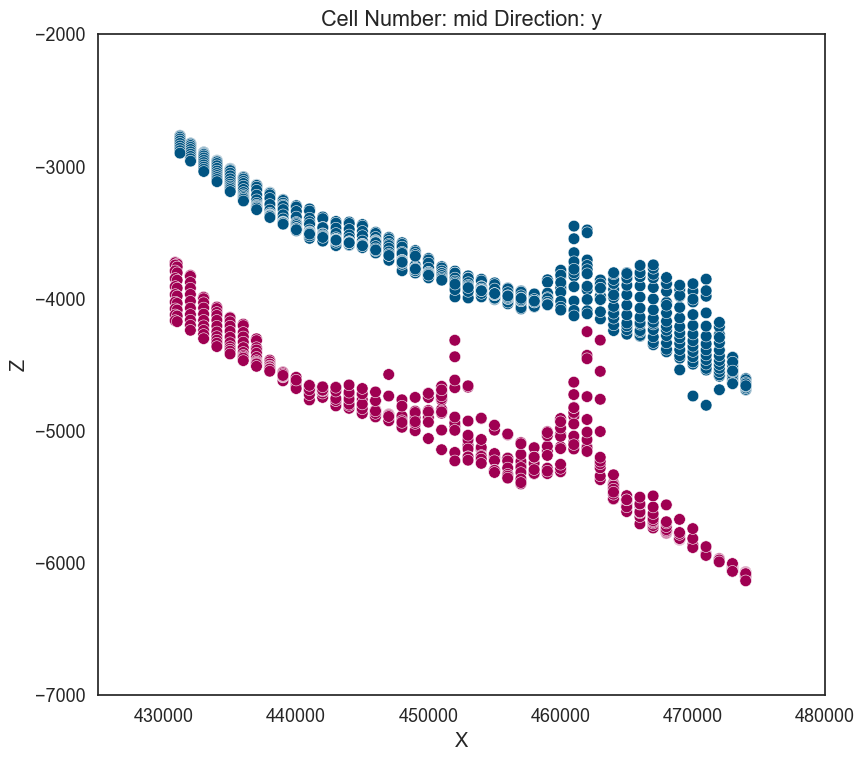

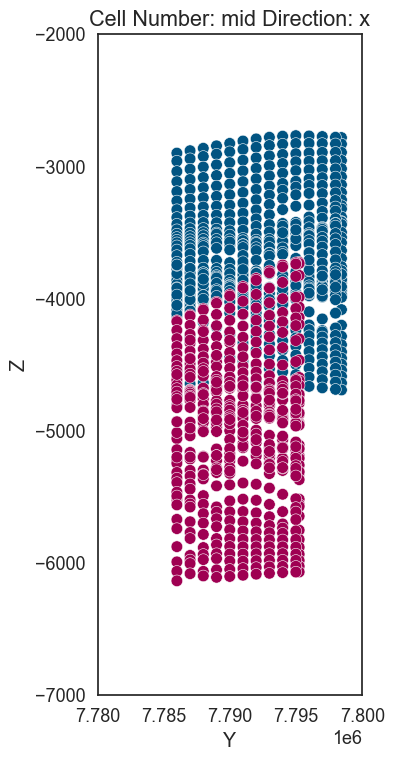

In [6]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    show_data=True,
    ve=2,
)

In [7]:
# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_run",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=False)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               58736.700622
$C_o$            82142857.142857
drift equations           [3, 3]


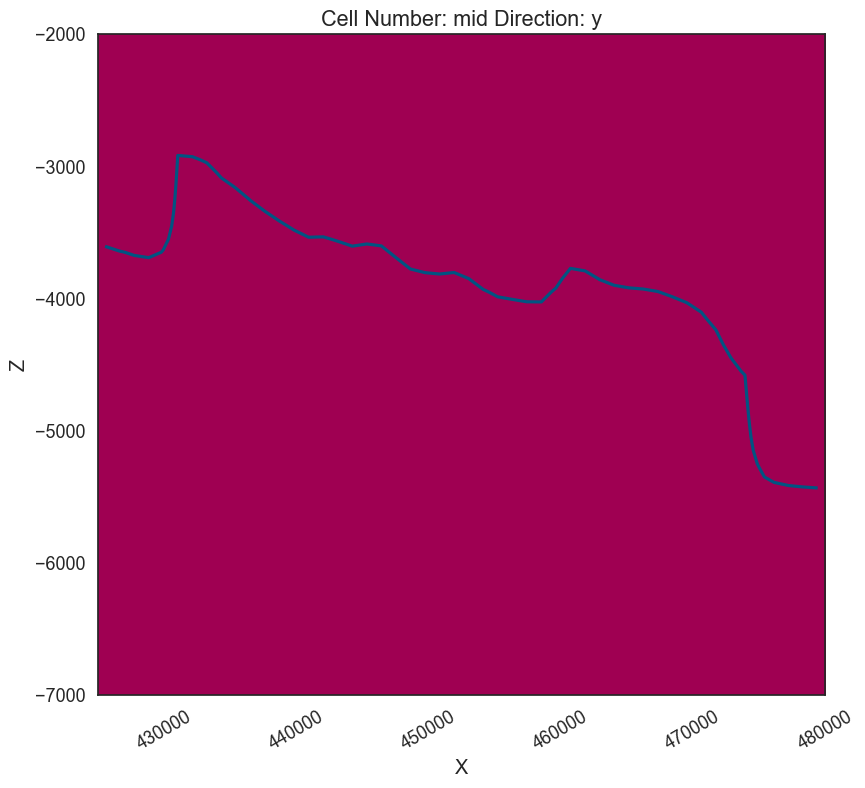

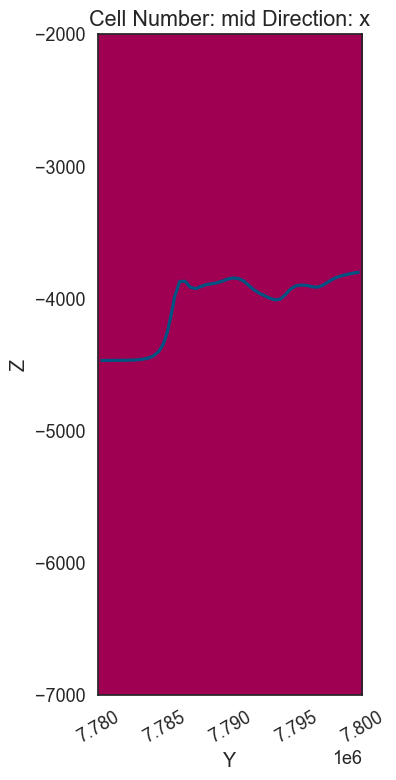

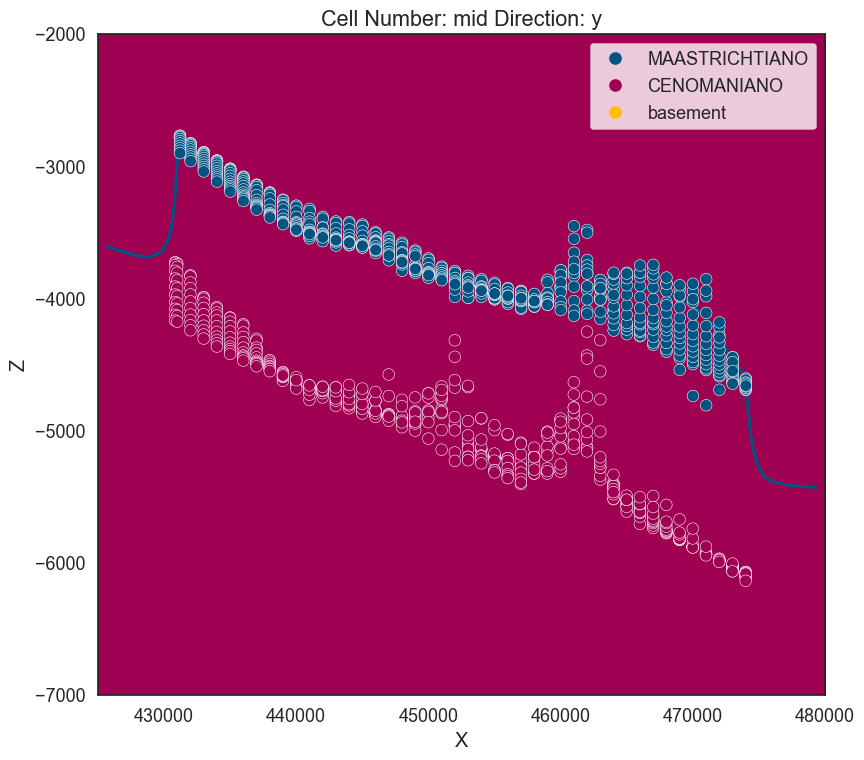

In [8]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

gp.plot_2d(
    geo_model,
    direction="y",
    show_data=True,
    show_lith=True,
    ve=10,
)

In [10]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
geo_model.solutions

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=False,
    solution=True,
)